In [ ]:
import pandas as pd
import numpy as np
#import optuna

In [ ]:
df = pd.read_csv('SA_Aqar.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          3718 non-null   object
 1   district      3718 non-null   object
 2   front         3718 non-null   object
 3   size          3718 non-null   int64 
 4   property_age  3718 non-null   int64 
 5   bedrooms      3718 non-null   int64 
 6   bathrooms     3718 non-null   int64 
 7   livingrooms   3718 non-null   int64 
 8   kitchen       3718 non-null   int64 
 9   garage        3718 non-null   int64 
 10  driver_room   3718 non-null   int64 
 11  maid_room     3718 non-null   int64 
 12  furnished     3718 non-null   int64 
 13  ac            3718 non-null   int64 
 14  roof          3718 non-null   int64 
 15  pool          3718 non-null   int64 
 16  frontyard     3718 non-null   int64 
 17  basement      3718 non-null   int64 
 18  duplex        3718 non-null   int64 
 19  stairs

In [ ]:
df.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...


In [ ]:
df.shape

(3718, 24)

In [ ]:
df.isnull().sum()
df.drop('details', axis=1,inplace=True)

In [ ]:
describe_df = df.describe().T

In [ ]:
describe_df.to_csv('describe.csv', sep=',')

In [ ]:
df.duplicated().sum()

2207

In [ ]:
target = df.price.values

In [ ]:
# import  numpy  as  np
# logged_target=np.log(target)

In [ ]:
num_features = df.select_dtypes( "number").reset_index(drop=True)
text_features = df.select_dtypes( "object").reset_index(drop=True)

In [ ]:
text_features

,city,district,front
0,الرياض,حي العارض,شمال
1,الرياض,حي القادسية,جنوب
2,الرياض,حي القادسية,جنوب
3,الرياض,حي المعيزلة,غرب
4,الرياض,حي العليا,غرب
...,...,...,...
3713,الخبر,حي اللؤلؤ,غرب
3714,الخبر,حي الصواري,جنوب
3715,الخبر,حي اللؤلؤ,غرب
3716,الخبر,حي الكورنيش,جنوب


In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(sparse=False)
# ohe.fit(text_features)
# ohe_data = ohe.transform(text_features)
# ohe_data = pd.DataFrame(ohe_data,columns=ohe.get_feature_names_out())

In [ ]:
categorical_columns = [
    column for column in df.columns
    if df[column].dtype in ["object"]
]

In [ ]:
categorical_columns

['city', 'district', 'front']

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df[categorical_columns] = df[categorical_columns].apply(label_encoder.fit_transform)

In [ ]:
df.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price
0,2,79,6,250,0,5,5,1,1,1,...,0,0,0,1,0,1,1,0,0,80000
1,2,92,2,370,0,4,5,2,1,1,...,0,0,0,1,0,0,1,0,0,60000
2,2,92,2,380,0,4,5,1,1,1,...,0,1,0,1,0,0,1,0,0,60000
3,2,109,9,250,0,5,5,3,0,1,...,0,0,0,1,0,0,0,0,0,55000
4,2,86,9,400,11,7,5,2,1,1,...,0,1,0,1,0,1,1,0,0,70000


In [ ]:
X = df.drop('price',axis=1)
y = df.price

logged_taget = np.log(y)

In [ ]:
from  sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# from lazypredict.Supervised import LazyRegressor

# reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
# models,predictions = reg.fit(X_train, X_test, y_train, y_test)

In [ ]:
models

NameError: name 'models' is not defined

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, knn.predict(X_test))
print('mae= '+ str(mae))

msr= mean_squared_error(y_test, knn.predict(X_test))
print('msr=  '+ str(msr))

r2_score(y_test, knn.predict(X_test))
r2score= r2_score(y_test, knn.predict(X_test))
print('r2score=  '+ str(r2score))

mae= 20637.291666666668
msr=  3346947484.0389786
r2score=  0.11827319108237155


In [ ]:
from sklearn.model_selection import GridSearchCV

# Create an instance of the KNeighborsRegressor
regressor = KNeighborsRegressor()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weighting function for predictions
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm for nearest neighbors search
}

# Create a GridSearchCV object with the regressor and parameter grid
grid_search = GridSearchCV(regressor, param_grid, scoring='neg_mean_absolute_error', cv=10)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Get the best estimator and best parameters found by GridSearchCV
best_regressor = grid_search.best_estimator_
best_params = grid_search.best_params_

# Use the best estimator to make predictions on new data
predictions = best_regressor.predict(X_test)

# Evaluate the performance of the best estimator
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Best parameters:", best_params)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

Best parameters: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
MAE: 19090.836702718814
MSE: 2571488425.8396025
R2 Score: 0.322561738809236


In [ ]:
KNN_Best_para = {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

KNN_Best = KNeighborsRegressor(**KNN_Best_para)
KNN_Best.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9, weights='distance')

In [ ]:
%%time

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection
sfs_knn = SFS(KNN_Best,
          k_features=(1,22),
          forward=True,
          floating=False,
          scoring='neg_mean_squared_error',
          verbose=2,
          n_jobs=-1,
          cv=10)
sfs_knn = sfs_knn.fit(X_train, y_train)

print('\nSequential Forward Selection :')
print(sfs_knn.k_feature_idx_)
print('CV Score:')
print(sfs_knn.k_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  22 | elapsed:    4.7s remaining:   30.6s
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:    5.3s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    5.5s finished

[2023-06-03 21:40:22] Features: 1/22 -- score: -4867550464.625898[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.0s finished

[2023-06-03 21:40:22] Features: 2/22 -- score: -4516510755.3052635[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.0s finished

[2023-06-03 21:40:22] Features: 3/22 -- score: -4207209547.227607[Parallel(n_jobs=-1)]: Using back


Sequential Forward Selection :
(0, 1, 2, 5, 7, 8, 10, 13, 14, 15, 17, 18, 20, 21)
CV Score:
-3708569045.1997957
CPU times: total: 1.02 s
Wall time: 10.1 s


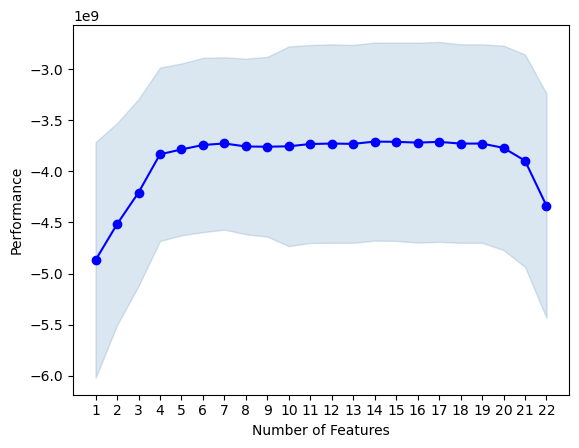

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
plot_sfs(sfs_knn.get_metric_dict(), kind='std_err');

In [ ]:
#Check accuracy for feature selection here

X_train_sfs = sfs_knn.transform(X_train)
X_test_sfs = sfs_knn.transform(X_test)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
KNN_Best.fit(X_train_sfs, y_train)
y_pred = KNN_Best.predict(X_test_sfs)
train_y_pred = KNN_Best.predict(X_train_sfs)

#Compute the mean squared error of the prediction
r2 = r2_score(y_test, y_pred)
print('Test set R2: %.2f' % r2)
#Compute the mean squared error of the prediction
mse = mean_squared_error(y_test, y_pred)
print('Test set MSE: %.2f' % mse)
#Compute the mean squared error of the prediction
mae = mean_absolute_error(y_test, y_pred)
print('Test set MAE: %.2f' % mae)

#Compute the mean squared error of the prediction
train_mse = r2_score(y_train, train_y_pred)
print('Train set R2: %.2f' % train_mse)

Test set R2: 0.46
Test set MSE: 2055241617.92
Test set MAE: 17195.98
Train set R2: 1.00


# LGBM

In [ ]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()
lgbm.fit(X_train, y_train)

LGBMRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, lgbm.predict(X_test))
print('mae= '+ str(mae))

msr= mean_squared_error(y_test, lgbm.predict(X_test))
print('msr=  '+ str(msr))

r2_score(y_test, lgbm.predict(X_test))
r2score= r2_score(y_test, lgbm.predict(X_test))
print('r2score=  '+ str(r2score))

mae= 18023.76467463802
msr=  2054624958.45296
r2score=  0.458725326053504


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the parameter grid to search over
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.1, 0.05, 0.01],
#     'max_depth': [3, 5, 7],
#     'num_leaves': [31, 63, 127]
# }

param_grid = {
    'n_estimators': [200, 300, 400],
    'learning_rate': [0.1, 0.05, 0.01, 0.001],
    'max_depth': [5, 7, 9],
    'num_leaves': [31, 63, 127, 255]
}

# Create the LGBMRegressor model
model = LGBMRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Create the final LGBMRegressor model with the best hyperparameters
best_model = LGBMRegressor(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set using the final model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics using the final model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('MAE:', mae)
print('MSE:', mse)
print('R2 Score:', r2)

Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 200, 'num_leaves': 63}
MAE: 18299.238285113403
MSE: 2013424469.5059247
R2 Score: 0.4695792685842295


In [ ]:
Best_Hyperparameters= {'learning_rate': 0.05, 'max_depth': 9, 'n_estimators': 200, 'num_leaves': 63}

In [ ]:
from lightgbm import LGBMRegressor

best_lgbm = LGBMRegressor(**Best_Hyperparameters)
best_lgbm.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.05, max_depth=9, n_estimators=200, num_leaves=63)

In [ ]:
%%time

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection
sfs_lgbm = SFS(best_lgbm,
          k_features=(1,22),
          forward=True,
          floating=False,
          scoring='neg_mean_squared_error',
          verbose=2,
          n_jobs=-1,
          cv=10)
sfs_lgbm = sfs_lgbm.fit(X_train, y_train)

print('\nSequential Forward Selection :')
print(sfs_lgbm.k_feature_idx_)
print('CV Score:')
print(sfs_lgbm.k_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  22 | elapsed:    0.8s remaining:    5.7s
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:    1.1s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    1.4s finished

[2023-06-03 21:43:54] Features: 1/22 -- score: -4227506933.9115767[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:    1.7s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    2.3s finished

[2023-06-03 21:43:57] Features: 2/22 -- score: -3724615555.676197[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:    1.5s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    2.2s finished

[2023-06-03 21:43:59] Features: 3/22 -- score: -3478566444.966033[Parallel(n_jobs=-1)]: Using back


Sequential Forward Selection :
(0, 1, 3, 4, 5, 7, 8, 10, 11, 13, 14, 16, 18, 20)
CV Score:
-3223739297.7369933
CPU times: total: 40.2 s
Wall time: 39.2 s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.1s finished

[2023-06-03 21:44:32] Features: 22/22 -- score: -3421927803.215592

In [ ]:
#Check accuracy for feature selection here

X_train_sfs = sfs_lgbm.transform(X_train)
X_test_sfs = sfs_lgbm.transform(X_test)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
best_lgbm.fit(X_train_sfs, y_train)
y_pred = best_lgbm.predict(X_test_sfs)
train_y_pred = best_lgbm.predict(X_train_sfs)

#Compute the mean squared error of the prediction
r2 = r2_score(y_test, y_pred)
print('Test set R2: %.2f' % r2)
#Compute the mean squared error of the prediction
mse = mean_squared_error(y_test, y_pred)
print('Test set MSE: %.2f' % mse)
#Compute the mean squared error of the prediction
mae = mean_absolute_error(y_test, y_pred)
print('Test set MAE: %.2f' % mae)

#Compute the mean squared error of the prediction
train_mse = r2_score(y_train, train_y_pred)
print('Train set R2: %.2f' % train_mse)

Test set R2: 0.45
Test set MSE: 2080534798.11
Test set MAE: 18919.30
Train set R2: 0.63


# HistGradientBoostingRegressor

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

hg = HistGradientBoostingRegressor()
hg.fit(X_train, y_train)

HistGradientBoostingRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, hg.predict(X_test))
print('mae= '+ str(mae))

msr= mean_squared_error(y_test, hg.predict(X_test))
print('msr=  '+ str(msr))

r2_score(y_test, hg.predict(X_test))
r2score= r2_score(y_test, hg.predict(X_test))
print('r2score=  '+ str(r2score))

mae= 18252.82795905782
msr=  2073261016.1793659
r2score=  0.45381580423152457


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the parameter grid to search over
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'max_iter': [100, 200, 300],
    'max_depth': [None, 3, 5]
}

# Create the HistGradientBoostingRegressor model
model = HistGradientBoostingRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=10, n_jobs=-1, verbose=1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found
best_params = grid_search.best_params_
print('Best Hyperparameters:', best_params)

# Create the final HistGradientBoostingRegressor model with the best hyperparameters
best_model = HistGradientBoostingRegressor(**best_params)
best_model.fit(X_train, y_train)

# Make predictions on the test set using the final model
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics using the final model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('MAE:', mae)
print('MSE:', mse)
print('R2 Score:', r2)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': None, 'max_iter': 200}
MAE: 17957.42462185003
MSE: 2054882022.6834881
R2 Score: 0.45865760451776094


In [ ]:
Best_Hyperparameters= {'learning_rate': 0.05, 'max_depth': None, 'max_iter': 200}

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

best_hg = HistGradientBoostingRegressor(**Best_Hyperparameters)
best_hg.fit(X_train, y_train)

HistGradientBoostingRegressor(learning_rate=0.05, max_iter=200)

In [ ]:
%%time

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection
sfs_hg = SFS(best_hg,
          k_features=(1,22),
          forward=True,
          floating=False,
          scoring='neg_mean_squared_error',
          verbose=2,
          n_jobs=-1,
          cv=10)
sfs_hg = sfs_hg.fit(X_train, y_train)

print('\nSequential Forward Selection :')
print(sfs_hg.k_feature_idx_)
print('CV Score:')
print(sfs_hg.k_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  22 | elapsed:    6.6s remaining:   42.6s
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:    7.6s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:   10.1s finished

[2023-06-03 21:53:54] Features: 1/22 -- score: -4207775715.6382995[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  21 | elapsed:   10.0s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   13.9s finished

[2023-06-03 21:54:08] Features: 2/22 -- score: -3695535291.6845155[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:    9.1s remaining:    7.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   12.8s finished

[2023-06-03 21:54:21] Features: 3/22 -- score: -3487607824.287309[Parallel(n_jobs=-1)]: Using bac


Sequential Forward Selection :
(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 14, 16, 17, 18, 20)
CV Score:
-3224793002.3601904
CPU times: total: 9.2 s
Wall time: 3min 25s


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.3s finished

[2023-06-03 21:57:09] Features: 22/22 -- score: -3334806325.096121

In [ ]:
#Check accuracy for feature selection here

X_train_sfs = sfs_hg.transform(X_train)
X_test_sfs = sfs_hg.transform(X_test)

# Fit the estimator using the new feature subset
# and make a prediction on the test data
best_hg.fit(X_train_sfs, y_train)
y_pred = best_hg.predict(X_test_sfs)
train_y_pred = best_hg.predict(X_train_sfs)

#Compute the mean squared error of the prediction
r2 = r2_score(y_test, y_pred)
print('Test set R2: %.2f' % r2)
#Compute the mean squared error of the prediction
mse = mean_squared_error(y_test, y_pred)
print('Test set MSE: %.2f' % mse)
#Compute the mean squared error of the prediction
mae = mean_absolute_error(y_test, y_pred)
print('Test set MAE: %.2f' % mae)

#Compute the mean squared error of the prediction
train_mse = r2_score(y_train, train_y_pred)
print('Train set R2: %.2f' % train_mse)

Test set R2: 0.45
Test set MSE: 2104614701.60
Test set MAE: 19024.37
Train set R2: 0.66


# Explainable AI

In [ ]:
import shap

explainer = shap.TreeExplainer(best_lgbm)
shap_values = explainer(X_test)

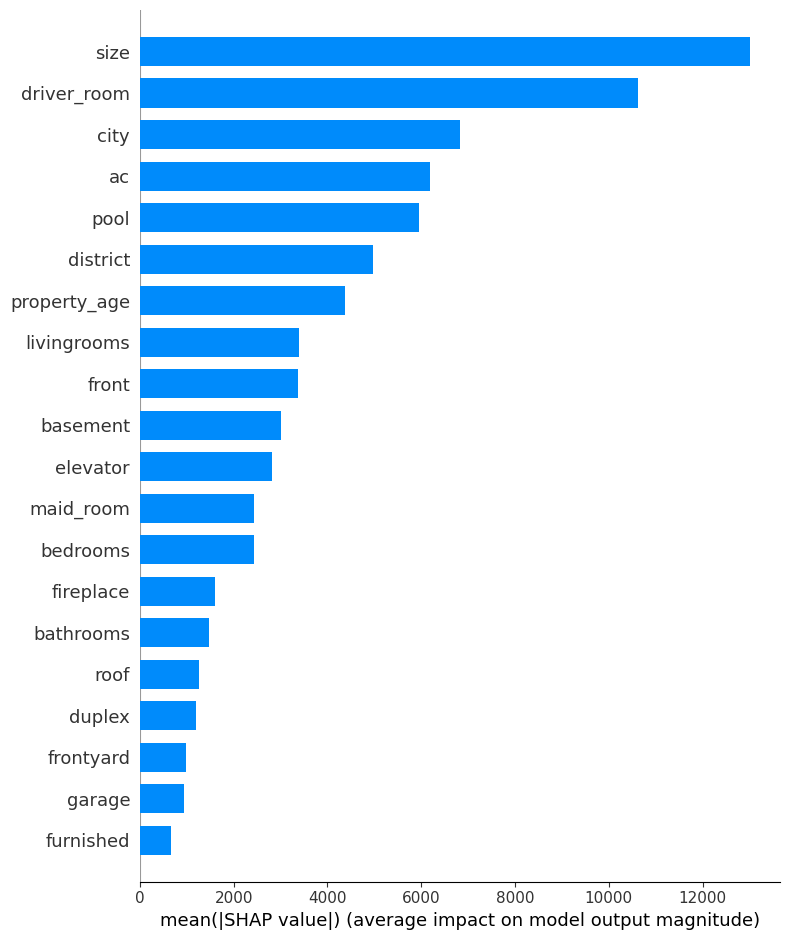

In [ ]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

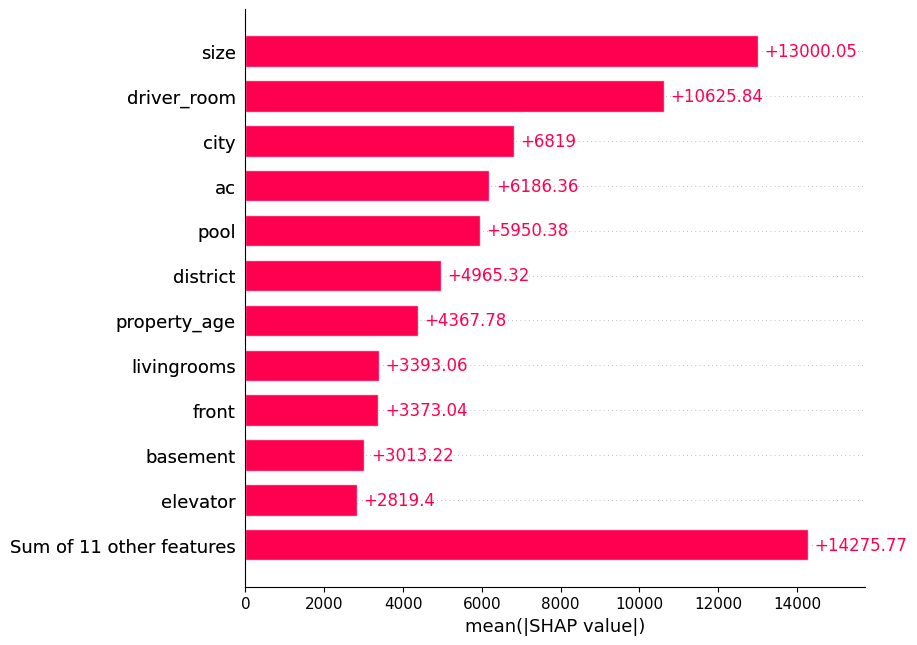

In [ ]:
shap.plots.bar(shap_values,max_display=12)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


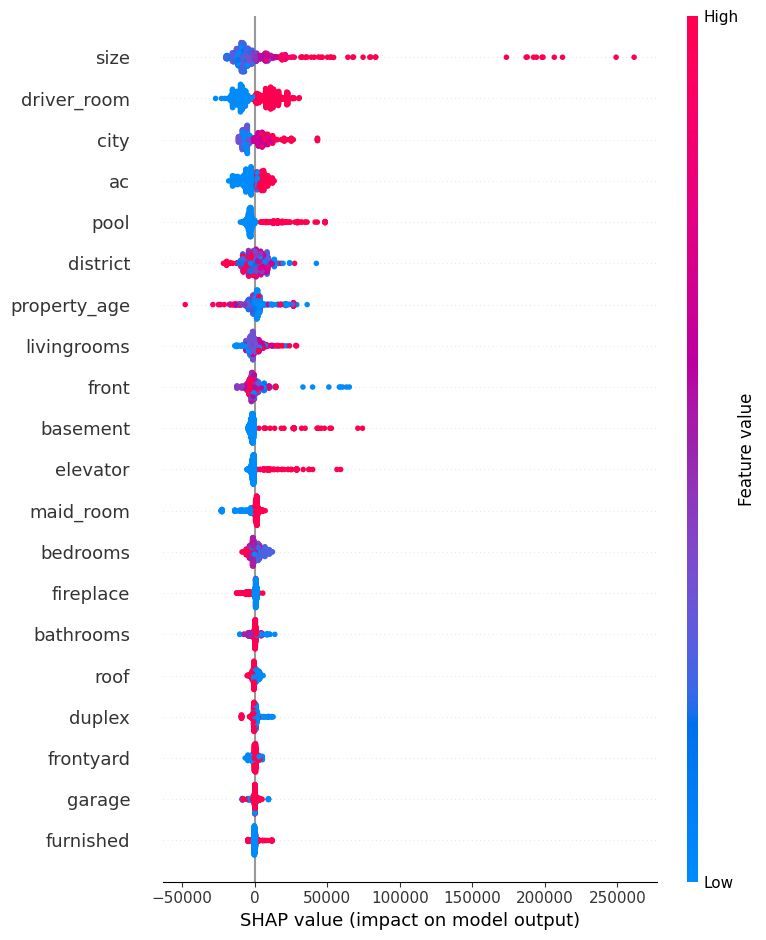

In [ ]:
shap.summary_plot(shap_values, X_test)